In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
#Importamos datos experimentales
medidos = pd.read_csv('../../proyecto_final_EE-main/data/weekends.csv',index_col=0,parse_dates=True,names=['tiempo','Ti_ex'],skiprows=1) 
medidos

,Ti_ex
tiempo,
2019-06-08 00:00:00,25.348056
2019-06-08 00:00:20,25.354979
2019-06-08 00:00:40,25.359593
2019-06-08 00:01:00,25.348056
2019-06-08 00:01:20,25.351517
...,...
2019-07-28 23:58:20,24.798895
2019-07-28 23:58:40,24.802356
2019-07-28 23:59:00,24.673142


In [5]:
CC = pd.read_csv('../IDF/Caso_infil_abs/Proyecto_caso_absortancia_mas_infilt.csv',names=['tiempo','Ti_C1','Ti_C2','Ti_CC','Ti_techo1','Ti_techo2','Ti_techoJorge'],skiprows=1)
CC.tiempo = CC.tiempo.str.replace('24:00:00','23:59:59')
CC.tiempo = '2019 ' + CC.tiempo
CC.tiempo = pd.to_datetime(CC.tiempo,format='%Y %m/%d %H:%M:%S')
CC.set_index('tiempo',inplace=True)
del CC['Ti_C1']
del CC['Ti_C2']
del CC['Ti_techo1']
del CC['Ti_techo2']
del CC['Ti_techoJorge']
CC

,Ti_CC
tiempo,
2019-05-03 00:10:00,26.683676
2019-05-03 00:20:00,26.515676
2019-05-03 00:30:00,26.977210
2019-05-03 00:40:00,26.973083
2019-05-03 00:50:00,26.888110
...,...
2019-06-25 23:20:00,6.605097
2019-06-25 23:30:00,6.550106
2019-06-25 23:40:00,6.495531


In [6]:
compara  = pd.concat([medidos,CC],axis=1)
compara

,Ti_ex,Ti_CC
tiempo,,
2019-05-03 00:10:00,NaN,26.683676
2019-05-03 00:20:00,NaN,26.515676
2019-05-03 00:30:00,NaN,26.977210
2019-05-03 00:40:00,NaN,26.973083
2019-05-03 00:50:00,NaN,26.888110
...,...,...
2019-07-28 23:58:20,24.798895,NaN
2019-07-28 23:58:40,24.802356,NaN
2019-07-28 23:59:00,24.673142,NaN


## Hacemos la gráfica de fechas de validación

### 08/06/2019

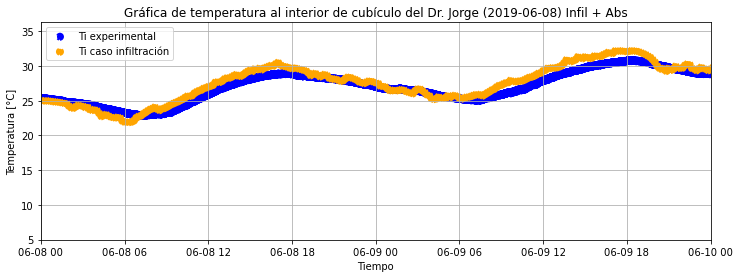

In [7]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-08')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CC, linestyle='--', linewidth=2, color='orange', label="Ti caso infiltración")
fin1 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-08) Infil + Abs')
ax.legend()
ax.grid()

### 15/06/2019

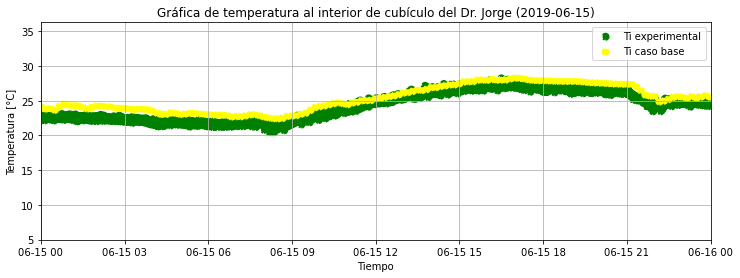

In [9]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-15')
fecha2 = fecha1 + pd.Timedelta('1D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='green', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CC, linestyle='--', linewidth=2, color='yellow', label="Ti caso base")
fin2 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-15)')
ax.legend()
ax.grid()

### 22/06/2019

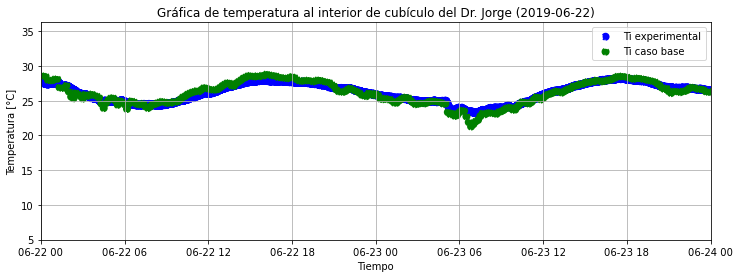

In [11]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CC, linestyle='--', linewidth=2, color='green', label="Ti caso base")
fin3 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-22)')
ax.legend()
ax.grid()

In [12]:
analisis = pd.concat([fin1,fin2,fin3],axis=0)
analisis

,Ti_ex,Ti_CC
tiempo,,
2019-06-08 00:00:00,25.348056,NaN
2019-06-08 00:00:20,25.354979,NaN
2019-06-08 00:00:40,25.359593,NaN
2019-06-08 00:01:00,25.348056,NaN
2019-06-08 00:01:20,25.351517,NaN
...,...,...
2019-06-23 23:58:40,26.435996,NaN
2019-06-23 23:59:00,26.429073,NaN
2019-06-23 23:59:20,26.425612,NaN


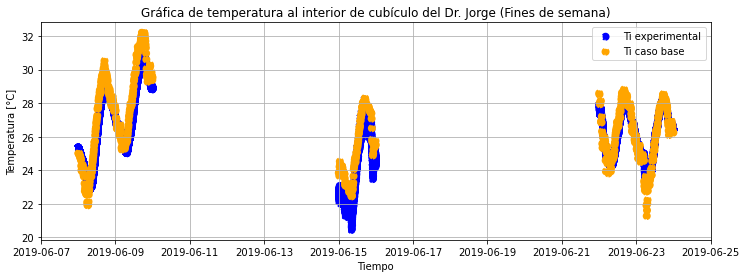

In [13]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-07')
fecha2 = fecha1 + pd.Timedelta('18D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(analisis.index,analisis.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(analisis.index,analisis.Ti_CC, linestyle='--', linewidth=2, color='orange', label="Ti caso base")

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (Fines de semana)')
ax.legend()
ax.grid()

In [17]:
analisis.sort_index(inplace=True)
del analisis['Ti_ex']
analisis

,Ti_CC
tiempo,
2019-06-08 00:00:00,NaN
2019-06-08 00:00:20,NaN
2019-06-08 00:00:40,NaN
2019-06-08 00:01:00,NaN
2019-06-08 00:01:20,NaN
...,...
2019-06-23 23:58:40,NaN
2019-06-23 23:59:00,NaN
2019-06-23 23:59:20,NaN


In [19]:
analisis = analisis.resample('1h').bfill()
analisis

,Ti_CC
tiempo,
2019-06-08 00:00:00,NaN
2019-06-08 01:00:00,24.869803
2019-06-08 02:00:00,24.263195
2019-06-08 03:00:00,24.248926
2019-06-08 04:00:00,23.613492
...,...
2019-06-23 19:00:00,28.200178
2019-06-23 20:00:00,27.750983
2019-06-23 21:00:00,26.364116


In [20]:
analisis.to_csv('../metricas/Fines_Caso_Combinado.csv')